# Q1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

df_raw = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

In [7]:
print(df_raw.shape)
df_raw.head()
df_raw.describe(include="object")
df_raw["판매유형별"].value_counts()
df_raw.head()

(2772, 5)


,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [21]:
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별", "시점"],
                value_name="백만")
df['연도'] = df_raw['시점'].apply(lambda x: x.split('.')[0]).astype(int)
df['분기'] = df_raw['시점'].apply(lambda x: x.split('.')[1][0]).astype(int)
df.describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


# Q2

In [37]:
q2 = df.copy()
q2 = q2.pivot_table(index='국가(대륙)별', columns='연도', values='백만', aggfunc='sum')
q2

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


<Axes: xlabel='연도', ylabel='국가(대륙)별'>

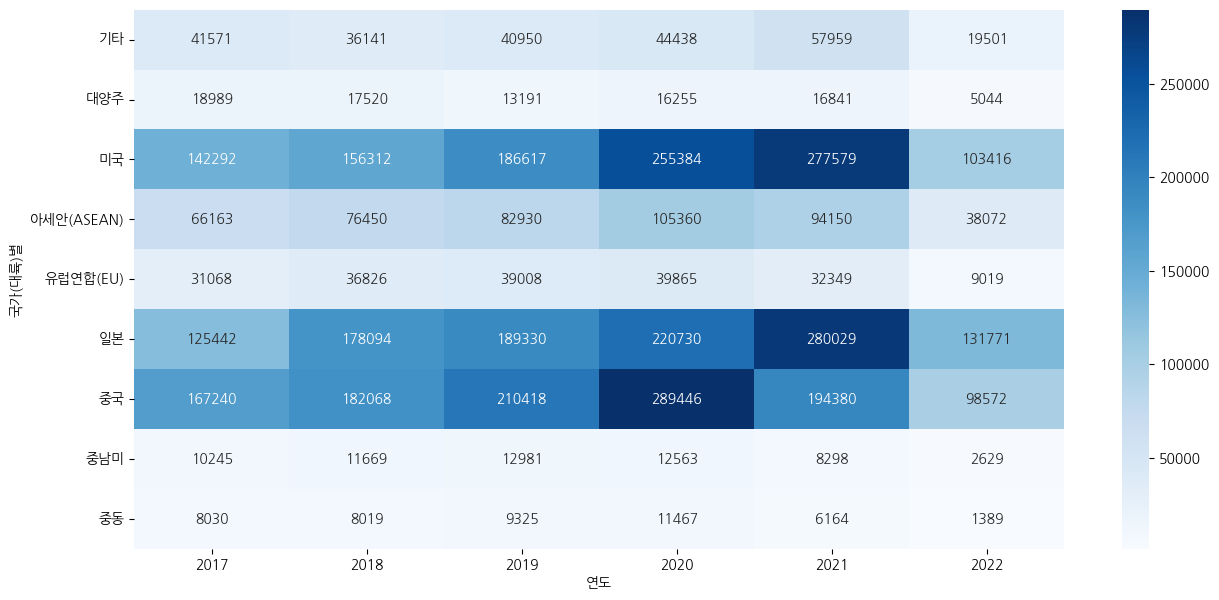

In [38]:
plt.figure(figsize=(15, 7))
sns.heatmap(q2, cmap="Blues", annot=True, fmt=".0f")

# Q3

In [59]:
df_new = df.copy()
df_new = df_new[(df_new["연도"] == 2020)]
q3 = df_new.groupby(['국가(대륙)별'])['백만'].sum()
q3

국가(대륙)별
기타             44438
대양주            16255
미국            255384
아세안(ASEAN)    105360
유럽연합(EU)       39865
일본            220730
중국            289446
중남미            12563
중동             11467
Name: 백만, dtype: int64

<Axes: ylabel='국가(대륙)별'>

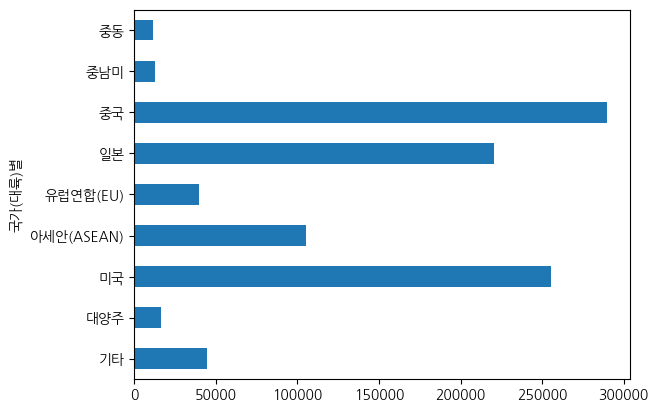

In [62]:
q3.plot.barh()

# Q4

<Figure size 1500x700 with 0 Axes>

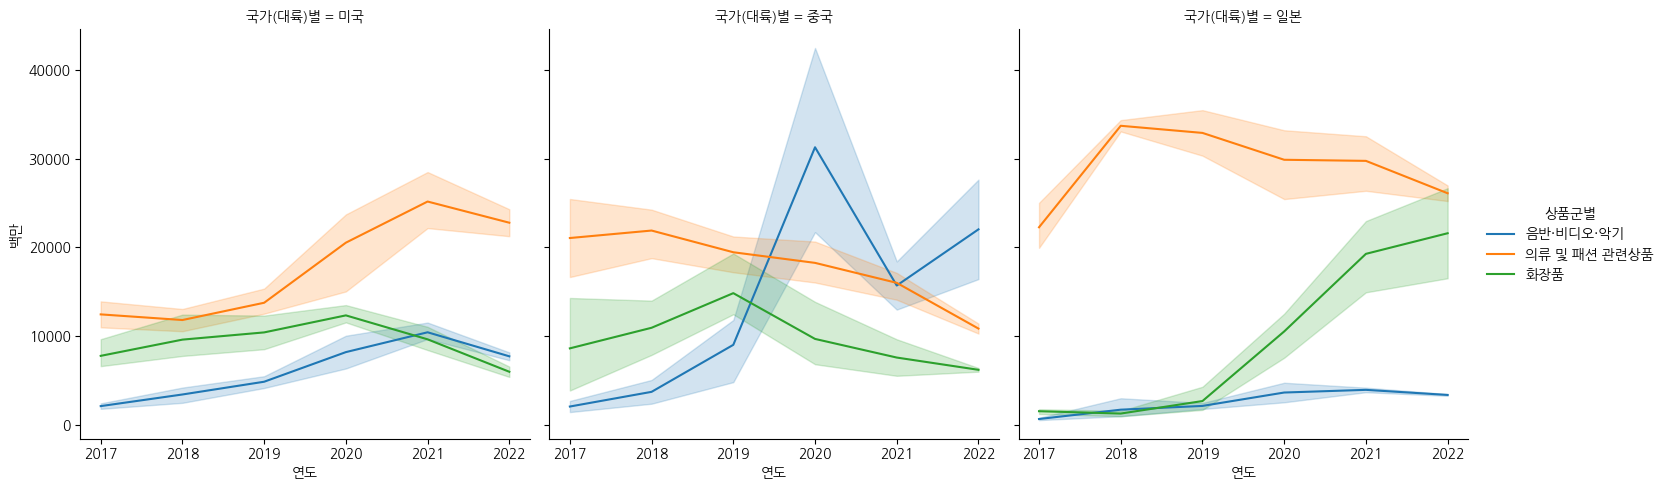

In [75]:
df_new = df.copy()
df_new = df_new[df_new['국가(대륙)별'].str.contains('미국|일본|중국') & 
        df['상품군별'].str.contains('의류 및 패션 관련상품|화장품|음반·비디오·악기')]

q4 = df_new.pivot_table(index='국가(대륙)별', columns='연도', values='백만')

plt.figure(figsize=(15, 7))
sns.relplot(x="연도", y="백만", data=df_new, hue="상품군별", col="국가(대륙)별", col_wrap=3, kind="line")

# Q5

In [100]:
df_test = pd.read_csv('adfsg.csv', encoding = 'cp949')
df_test.head()

,시점,행정구역별,신혼부부 수 (A),맞벌이 부부 수 (B),맞벌이 비율 (B/A*100),주택소유 신혼부부 수 (C),주택 소유율 (C/A*100),총 소유 주택 수 (D)\t,소유부부기준 1쌍당 평균 소유주택 수 (D/C),평균 출생아 수
0,2021,전국,1101455,569472,51.7,479791,43.6,603763,1.3,0.80
1,2021,서울특별시,200477,118770,59.2,74588,37.2,96108,1.3,0.62
2,2021,부산광역시,62431,31683,50.7,26694,42.8,35210,1.3,0.79
3,2021,대구광역시,45094,22219,49.3,21300,47.2,25495,1.2,0.83
4,2021,인천광역시,65347,31551,48.3,26646,40.8,33251,1.2,0.81
